# Reducir la dimensionalidad de los datos

In [7]:
import pandas as pd

# Leer un conjunto de datos
data = pd.read_csv('datasets/vino.csv')
data

,acidez fija,acidez volátil,ácido cítrico,azúcar residual,cloruros,dióxido de azufre libre,dióxido de azufre total,densidad,pH,sulfatos,alcohol,calidad
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Análisis de Componentes Principales (PCA)
# 2D

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalizar los datos (Z-score)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Aplicar PCA
pca = PCA(n_components=2)
data_result = pca.fit_transform(data_scaled)

# Mostrar resultados
print("Varianza explicada por cada componente:", pca.explained_variance_)
print("Proporcion de varianza explicada por cada componente:", pca.components_)

Varianza explicada por cada componente: [3.12312087 2.24328497]
Proporcion de varianza explicada por cada componente: [[ 0.48788336 -0.26512898  0.47333547  0.13915442  0.19742679 -0.04588071
   0.00406675  0.37030119 -0.43272085  0.25453535 -0.07317678  0.11248878]
 [ 0.00417321 -0.33896786  0.1373581  -0.16773634 -0.18978819 -0.25948314
  -0.36397137 -0.33078079  0.06544015  0.10933362  0.50270865  0.47316621]]


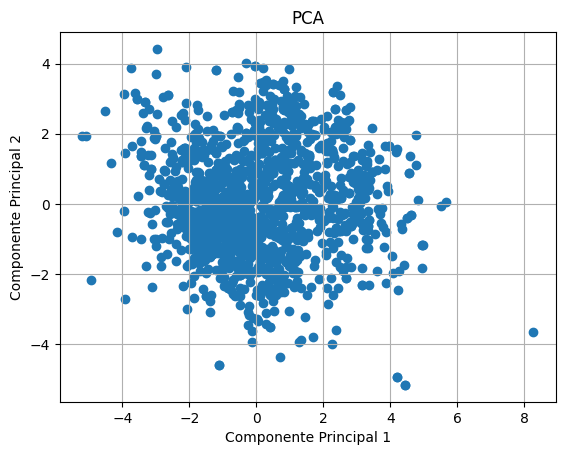

In [9]:
import matplotlib.pyplot as plt

# Se muestra los datos en 2d
plt.scatter(data_result[:, 0], data_result[:, 1])
plt.title('PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()

# 3D

In [18]:
# Aplicar PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_scaled)

# Mostrar resultados
print("Varianza explicada por cada componente:", pca.explained_variance_)
print("Proporcion de varianza explicada por cada componente:", pca.components_)

Varianza explicada por cada componente: [3.12312087 2.24328497 1.68397283]
Proporcion de varianza explicada por cada componente: [[ 0.48788336 -0.26512898  0.47333547  0.13915442  0.19742679 -0.04588071
   0.00406675  0.37030119 -0.43272085  0.25453535 -0.07317678  0.11248878]
 [ 0.00417321 -0.33896786  0.1373581  -0.16773634 -0.18978819 -0.25948314
  -0.36397137 -0.33078079  0.06544015  0.10933362  0.50270865  0.47316621]
 [-0.16482854 -0.22708884  0.10022856  0.24362014 -0.02660785  0.61611132
   0.54073214 -0.16872267  0.06977056  0.21291324  0.22497138  0.22336929]]


Text(0.5, 0, 'Componente Principal 3')

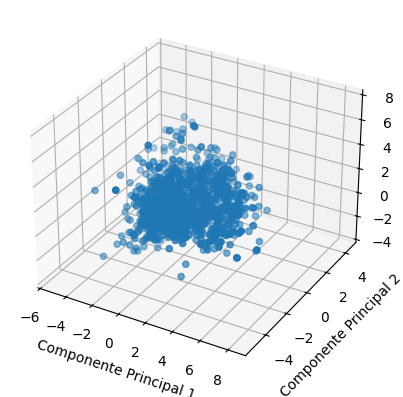

In [19]:
# Se muestra los datos en 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2])
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')